In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA1=pd.read_csv('/content/drive/MyDrive/DATA SETS/citibike_tripdata.csv')
DATA1


,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,name_localizedValue,usertype
0,338,2018-05-01 00:04:47,2018-05-01 00:10:25,3639,Harborside,3199,Newport Pkwy,33558,Annual Membership,Subscriber
1,1482,2018-05-01 01:31:10,2018-05-01 01:55:53,3681,Grand St,3185,City Hall,33593,24 Hour,Customer
2,232,2018-05-01 01:31:29,2018-05-01 01:35:22,3194,McGinley Square,3193,Lincoln Park,29217,FREE Bonus Month with Annual Membership,Subscriber
3,190,2018-05-01 02:03:29,2018-05-01 02:06:40,3185,City Hall,3186,Grove St PATH,29662,24 Hour,Customer
4,303,2018-05-01 04:27:12,2018-05-01 04:32:16,3207,Oakland Ave,3195,Sip Ave,15271,Annual Membership,Subscriber
...,...,...,...,...,...,...,...,...,...,...
32423,396,2018-05-30 13:49:18,2018-05-30 13:55:55,3184,Paulus Hook,3279,Dixon Mills,29639,Join Citi Bike for $14.95/month,Subscriber
32424,313,2018-05-30 13:49:21,2018-05-30 13:54:35,3202,Newport PATH,3639,Harborside,26301,$25 Off Annual Membership,Subscriber
32425,316,2018-05-30 13:49:51,2018-05-30 13:55:08,3220,5 Corners Library,3195,Sip Ave,29260,Annual Membership,Subscriber
32426,1130,2018-05-30 13:50:52,2018-05-30 14:09:42,3281,Leonard Gordon Park,3213,Van Vorst Park,26239,Annual Membership,Subscriber


In [400]:
DATA1.rename(columns={'name_localizedValue': 'MEMBERSHIP_TYPE'}, inplace=True)
DATA1['tripduration'] = (DATA1['tripduration'] / 60).round(2)


DATA1

#now the name of the column "name_localizedValue" is changed to "MEMBERSHIP_TYPE" for better visibility
#since the duration is in seconds coverting it into minutes for better anlysis


,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,MEMBERSHIP_TYPE,usertype
0,5.63,2018-05-01 00:04:47,2018-05-01 00:10:25,3639,Harborside,3199,Newport Pkwy,33558,Annual Membership,Subscriber
1,24.70,2018-05-01 01:31:10,2018-05-01 01:55:53,3681,Grand St,3185,City Hall,33593,24 Hour,Customer
2,3.87,2018-05-01 01:31:29,2018-05-01 01:35:22,3194,McGinley Square,3193,Lincoln Park,29217,FREE Bonus Month with Annual Membership,Subscriber
3,3.17,2018-05-01 02:03:29,2018-05-01 02:06:40,3185,City Hall,3186,Grove St PATH,29662,24 Hour,Customer
4,5.05,2018-05-01 04:27:12,2018-05-01 04:32:16,3207,Oakland Ave,3195,Sip Ave,15271,Annual Membership,Subscriber
...,...,...,...,...,...,...,...,...,...,...
32423,6.60,2018-05-30 13:49:18,2018-05-30 13:55:55,3184,Paulus Hook,3279,Dixon Mills,29639,Join Citi Bike for $14.95/month,Subscriber
32424,5.22,2018-05-30 13:49:21,2018-05-30 13:54:35,3202,Newport PATH,3639,Harborside,26301,$25 Off Annual Membership,Subscriber
32425,5.27,2018-05-30 13:49:51,2018-05-30 13:55:08,3220,5 Corners Library,3195,Sip Ave,29260,Annual Membership,Subscriber
32426,18.83,2018-05-30 13:50:52,2018-05-30 14:09:42,3281,Leonard Gordon Park,3213,Van Vorst Park,26239,Annual Membership,Subscriber


In [401]:
import datetime as dt



DATA1['day_name'] = pd.to_datetime(DATA1.starttime).dt.day_name()
DATA1['year'] =pd.to_datetime(DATA1.starttime).dt.year
DATA1['hour'] = pd.to_datetime(DATA1['starttime']).dt.hour
DATA1['month_name'] = pd.to_datetime(DATA1['starttime']).dt.month_name()

DATA1['TYPE_OF_WEEK'] = np.where(
    DATA1['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']),'WEEKDAY','WEEKEND')
DATA1['Time_of_Day'] = ''
DATA1.loc[(DATA1['hour'] >= 5) & (DATA1['hour'] < 12), 'Time_of_Day'] = 'Morning'
DATA1.loc[(DATA1['hour'] >= 12) & (DATA1['hour'] < 16), 'Time_of_Day'] = 'Afternoon'
DATA1.loc[(DATA1['hour'] >= 16) & (DATA1['hour'] < 21), 'Time_of_Day'] = 'Evening'
DATA1.loc[(DATA1['hour'] >= 21) | (DATA1['hour'] < 5), 'Time_of_Day'] = 'Night'

DATA1[['day_name','year','hour','month_name','TYPE_OF_WEEK','Time_of_Day']]

#COLUMNS SUCCESFULLY ADDES


,day_name,year,hour,month_name,TYPE_OF_WEEK,Time_of_Day
0,Tuesday,2018,0,May,WEEKDAY,Night
1,Tuesday,2018,1,May,WEEKDAY,Night
2,Tuesday,2018,1,May,WEEKDAY,Night
3,Tuesday,2018,2,May,WEEKDAY,Night
4,Tuesday,2018,4,May,WEEKDAY,Night
...,...,...,...,...,...,...
32423,Wednesday,2018,13,May,WEEKDAY,Afternoon
32424,Wednesday,2018,13,May,WEEKDAY,Afternoon
32425,Wednesday,2018,13,May,WEEKDAY,Afternoon
32426,Wednesday,2018,13,May,WEEKDAY,Afternoon


In [402]:
membership1= pd.DataFrame(DATA1['MEMBERSHIP_TYPE'].unique())
membership1
#checking all the  unique value of all membership

#MEMBERSHIP TYPE IS STORED IN membership1

,0
0,Annual Membership
1,24 Hour
2,FREE Bonus Month with Annual Membership
3,Annual Membership from Citi Bike App
4,$25 Off Annual Membership
5,Join Citi Bike for $14.95/month
6,Single Ride
7,JCBS Employee
8,Citi Bike Annual Membership
9,Annual Membership - Save 15%


In [403]:
usertype1= pd.DataFrame(DATA1['usertype'].unique())
usertype1

#this shows there are ony 2 types of customers

,0
0,Subscriber
1,Customer


In [404]:
all_stations = pd.concat([DATA1['start station name'], DATA1['end station name']])
a1=all_stations.unique()
print(len(a1))

a1=pd.DataFrame(a1)
a1                   #UNIQUE STATION IS STORED IN a1

#finding total of number of stations and their name

61


,0
0,Harborside
1,Grand St
2,McGinley Square
3,City Hall
4,Oakland Ave
...,...
56,W 16 St & The High Line
57,West St & Chambers St
58,12 Ave & W 40 St
59,W 113 St & Broadway


In [405]:
# What is the average trip duration?

average1=((DATA1['tripduration']).mean())
print(f"THE AVERAGE TRIP DURATION IS : {average1:.2f}")

THE AVERAGE TRIP DURATION IS : 13.32


In [406]:
# MOST BUSIEST STATION TOP 3 BOTH START AND END STATION

#"all_station" is variable taken fron 2 cell above "

most_popular_station = all_stations.value_counts()
most_popular_station.head(3)


,count
Grove St PATH,8033
Exchange Place,3920
Hamilton Park,3578


In [407]:
# least BUSIEST STATION bottom 6 BOTH START AND END STATION
#"all_station" is variable taken fron 3 cell above

least_popular_station = all_stations.value_counts()
least_popular_station.tail(6)

,count
Fulton St & Broadway,1
South End Ave & Liberty St,1
W 16 St & The High Line,1
West St & Chambers St,1
W 113 St & Broadway,1
FDR Drive & E 35 St,1


In [408]:
# MOST POPULAR ROUTE START TO END

route = DATA1['start station name'] + " → " + DATA1['end station name']
route1=pd.DataFrame(route)

most_common_routes = route1.value_counts()
most_common_routes.head(3)


,count
0,
Hamilton Park → Grove St PATH,683
Grove St PATH → Hamilton Park,445
Morris Canal → Exchange Place,430


In [409]:
# AVERAGE TRIP DURATION BY CUSTOMER AND SUBSCRIBER

avg_trip = DATA1.groupby('usertype')['tripduration'].mean().round(2)
pd.DataFrame(avg_trip)

,tripduration
usertype,
Customer,70.35
Subscriber,8.81


In [410]:
# WHO RIDES MORE CUSTOMER OR SUBSCRIBER

calc=(avg_trip['Customer']-avg_trip['Subscriber']).round(2)

if avg_trip['Subscriber'] > avg_trip['Customer']:
    print("Subscribers ride longer than Customers on average BY",calc)
else:
    print("Subscribers ride shorter than Customers on average by",calc)

Subscribers ride shorter than Customers on average by 61.54


In [411]:
# AVERAGE TRIP DURATION BY MEMBERSHIP TYPE

mem=DATA1.groupby('MEMBERSHIP_TYPE')['tripduration'].mean().round(2)
mem

,tripduration
MEMBERSHIP_TYPE,
$25 Off Annual Membership,9.59
$35 Off Annual Membership,4.92
$99 Annual Membership,7.85
24 Hour,89.00
24 Hour from Citi Bike Squad,19.92
3 Day,18.50
3-Day Pass from Citi Bike App,21.38
Annual Membership,8.08
Annual Membership - 10% Off,5.04


In [412]:
# TOP 3 MEMEBERSHIP_TYPE WITH RESPECT TO Duration

mem1=mem.sort_values(ascending=False)
mem3=mem1.head(3)
mem3


,tripduration
MEMBERSHIP_TYPE,
Motivate Employee,2546.82
24 Hour,89.00
Free Day Pass,84.63


In [413]:
# MOST USED BIKE BASED ON BIKE ID

bikeusage=DATA1['bikeid'].value_counts()
bikeusage.head(1)

,count
bikeid,
33625,130


In [414]:
# least USED BIKE BASED ON BIKE ID
bikeusage=DATA1['bikeid'].value_counts()
bikeusage.tail(3)


,count
bikeid,
29672,1
29125,1
17004,1


In [415]:
DATA1.describe()

,tripduration,start station id,end station id,bikeid,year,hour
count,32428.000000,32428.000000,32428.000000,32428.000000,32428.0,32428.000000
mean,13.316312,3264.568829,3255.485568,29817.647959,2018.0,13.490810
std,166.020065,137.810344,149.390306,2807.705863,0.0,5.175134
min,1.020000,3183.000000,212.000000,15271.000000,2018.0,0.000000
25%,3.930000,3192.000000,3186.000000,26310.000000,2018.0,8.000000
50%,5.870000,3206.000000,3203.000000,29516.000000,2018.0,14.000000
75%,9.830000,3272.000000,3270.000000,33568.000000,2018.0,18.000000
max,15616.170000,3681.000000,3681.000000,33682.000000,2018.0,23.000000



#checking all the  unique value of all membership (membership1)


#this shows there are ony 2 types of customers (usertype1)

                

#finding total of number of stations and their name (a1)

#AVERAGE BY TRIP DURATION OVERALL (average1)

# AVERAGE TRIP DURATION BY CUSTOMER AND SUBSCRIBER(avg_trip)

# AVERAGE TRIP DURATION BY MEMBERSHIP TYPE (mem)

# TOP 3 AVERAGE TRIP DURATION BY MEMBERSHIP TYPE (mem3)

#NUMBER OF TIME A BIKE IS USED(bikeusage)




STARTING  WITH GRAPHS

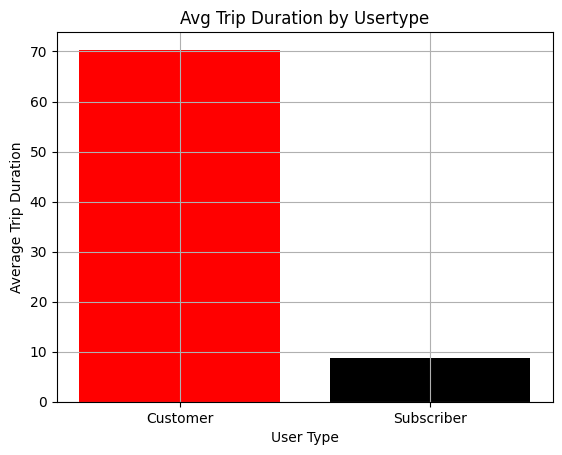

In [416]:
plt.bar(avg_trip.index, avg_trip.values,color=['r','k'])
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration')
plt.title('Avg Trip Duration by Usertype')
plt.grid(True)
plt.show()

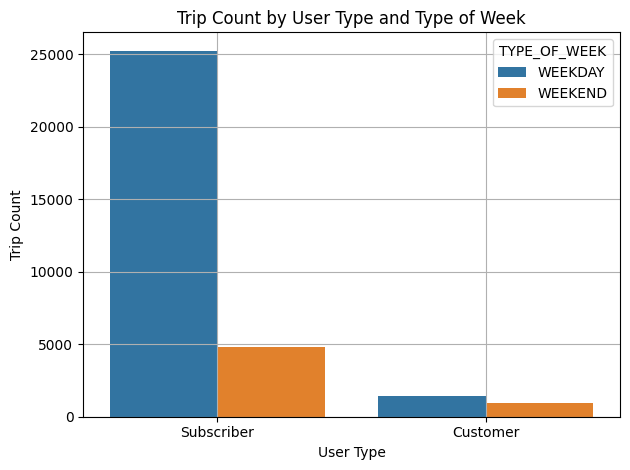

In [417]:
sns.countplot(x='usertype', hue='TYPE_OF_WEEK',data=DATA1, )
plt.xlabel('User Type')
plt.ylabel('Trip Count')
plt.title('Trip Count by User Type and Type of Week')
plt.grid(True)
plt.tight_layout()
plt.show()

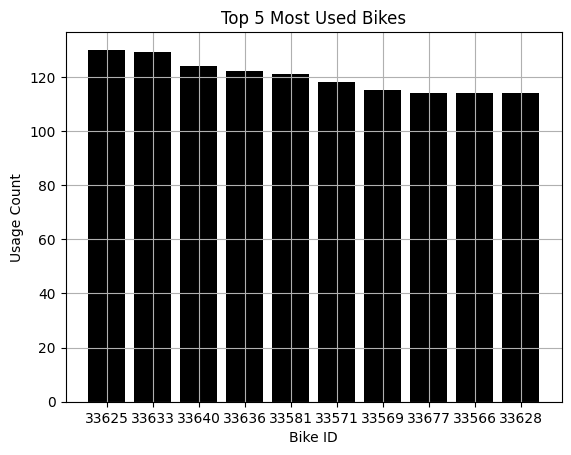

''

In [418]:
plt.bar(bikeusage.head(10).index.astype(str), bikeusage.head(10).values, color='k')
plt.xlabel('Bike ID')
plt.ylabel('Usage Count')
plt.title('Top 5 Most Used Bikes')
plt.grid(True)
plt.show()
""

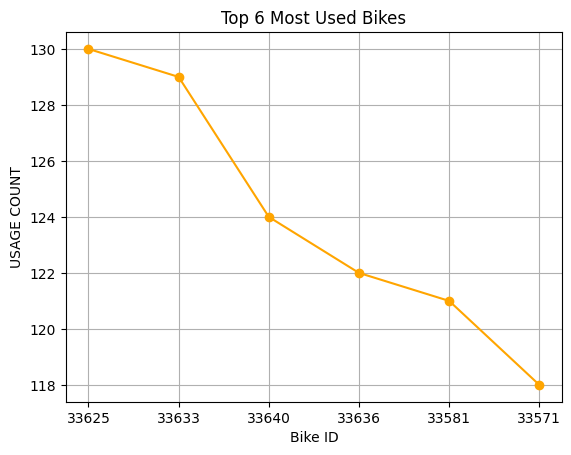

In [419]:
top_bikes = bikeusage.head(6)
plt.plot(top_bikes.index.astype(str), top_bikes.values, marker='o', color='orange')
plt.xlabel('Bike ID')
plt.ylabel('USAGE COUNT')
plt.title('Top 6 Most Used Bikes')
plt.grid(True)
plt.show()

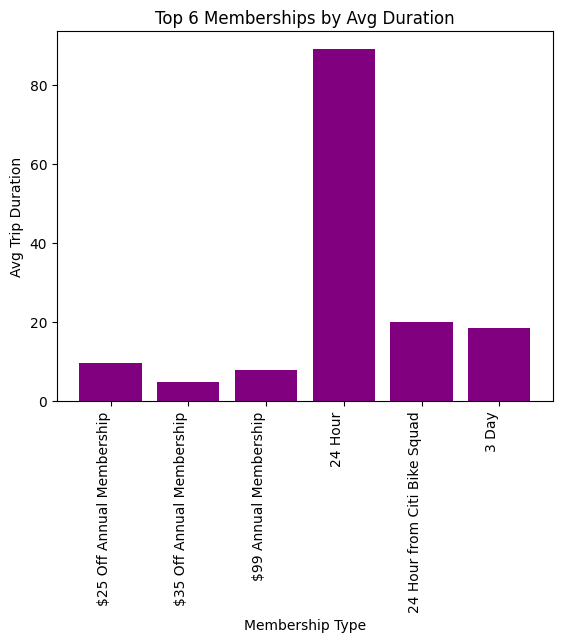

In [420]:
plt.bar(mem.head(6).index, mem.head(6).values,  color='purple')
plt.xlabel('Membership Type')
plt.ylabel('Avg Trip Duration')
plt.title('Top 6 Memberships by Avg Duration')
plt.xticks(rotation=90,ha='right')
plt.show()


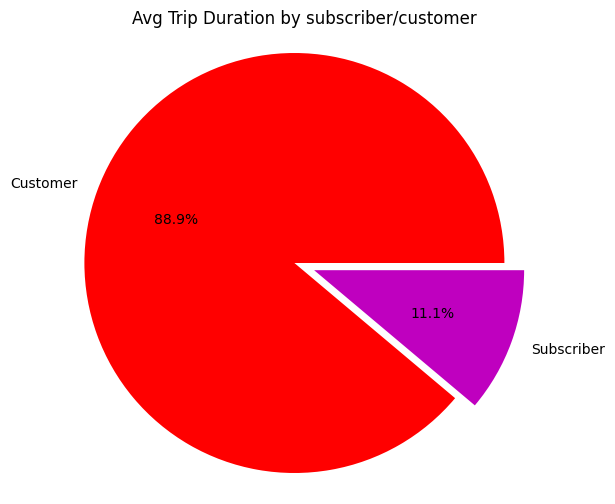

In [421]:
plt.figure(figsize=(6,6))
plt.pie(avg_trip.values , labels=avg_trip.index, autopct='%1.1f%%',explode=[0,0.1],colors=['r','m'])
plt.title('Avg Trip Duration by subscriber/customer')
plt.axis('equal')
plt.show()

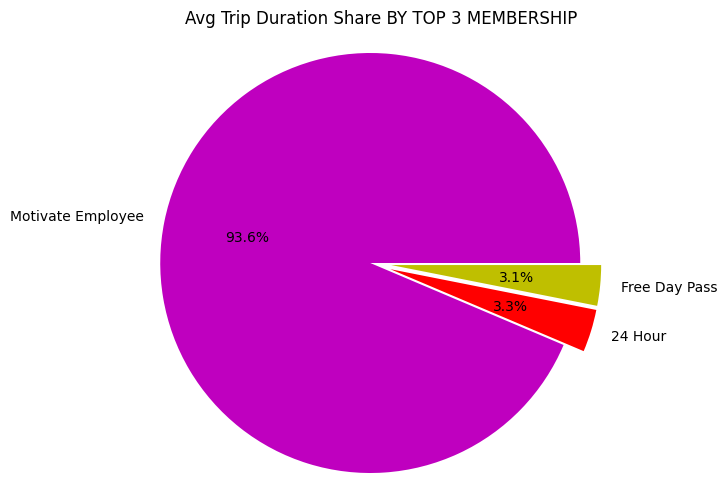

In [422]:
plt.figure(figsize=(6,6))
plt.pie(mem3.values , labels=mem3.index, autopct='%1.1f%%',colors=['m','r','y'],explode=[0,0.1,0.1])
plt.title('Avg Trip Duration Share BY TOP 3 MEMBERSHIP')
plt.axis('equal')
plt.show()

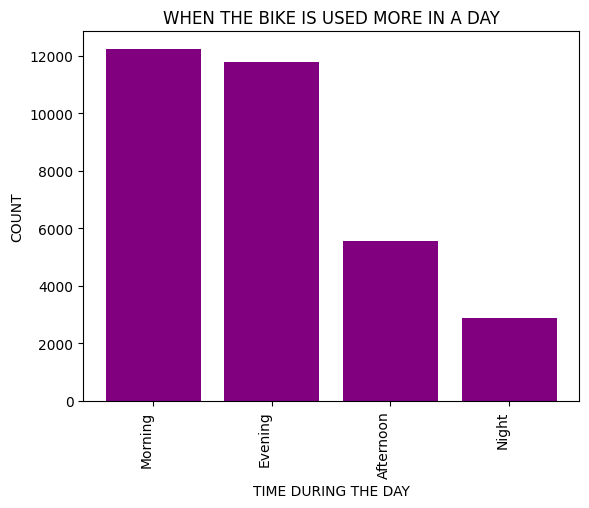

In [423]:
time_of_day1=DATA1['Time_of_Day'].value_counts()
plt.bar(time_of_day1.index, time_of_day1.values,color='purple')
plt.xlabel('TIME DURING THE DAY')
plt.ylabel('COUNT')
plt.title('WHEN THE BIKE IS USED MORE IN A DAY')
plt.xticks(rotation=90,ha='right')
plt.show()

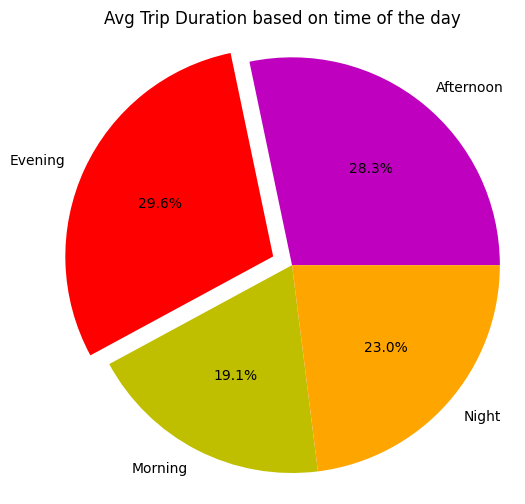

In [424]:
avg_trip_by_time_of_day = DATA1.groupby('Time_of_Day')['tripduration'].mean().round(2)

plt.figure(figsize=(6,6))
plt.pie(avg_trip_by_time_of_day.values , labels=avg_trip_by_time_of_day.index, autopct='%1.1f%%',colors=['m','r','y','orange'],explode=[0,0.1,0,0])
plt.title('Avg Trip Duration based on time of the day')
plt.axis('equal')
plt.show()

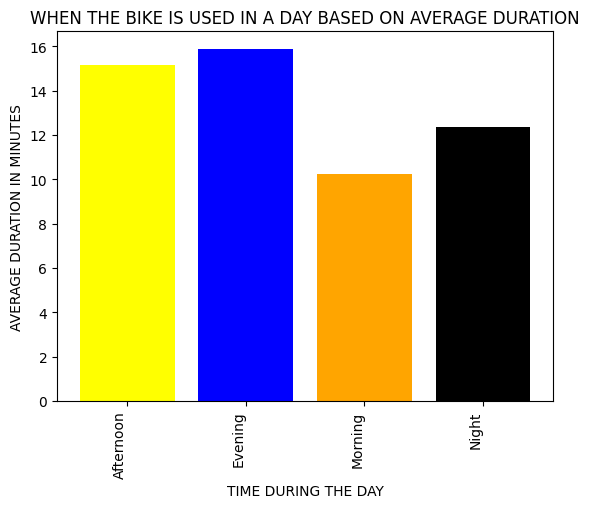

In [425]:

plt.bar(avg_trip_by_time_of_day.index, avg_trip_by_time_of_day.values,color=['yellow','blue','orange','black'])
plt.xlabel('TIME DURING THE DAY')
plt.ylabel('AVERAGE DURATION IN MINUTES')
plt.title('WHEN THE BIKE IS USED IN A DAY BASED ON AVERAGE DURATION')
plt.xticks(rotation=90,ha='right')
plt.show()

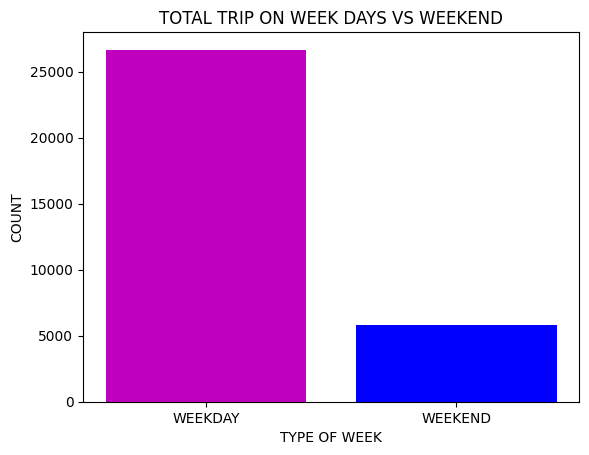

In [426]:
total_trip_by_week =DATA1['TYPE_OF_WEEK'].value_counts()
plt.bar(total_trip_by_week.index,total_trip_by_week.values,color=['m','b'])
plt.xlabel("TYPE OF WEEK")
plt.ylabel("COUNT")
plt.title("TOTAL TRIP ON WEEK DAYS VS WEEKEND")
plt.show()

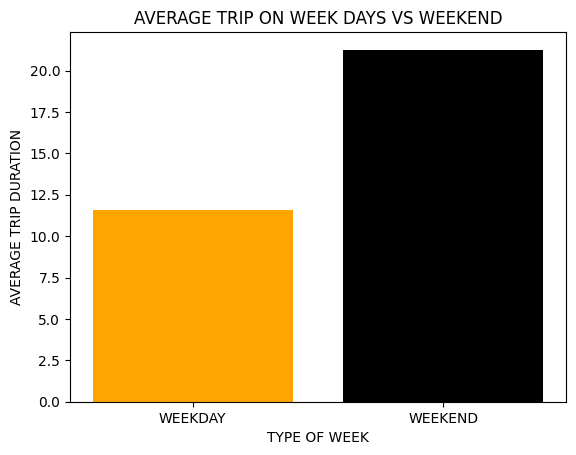

In [427]:
average_trip_by_week =DATA1.groupby('TYPE_OF_WEEK')['tripduration'].mean()
plt.bar(average_trip_by_week.index ,average_trip_by_week.values,color=['orange','k'])
plt.xlabel("TYPE OF WEEK")
plt.ylabel("AVERAGE TRIP DURATION")
plt.title("AVERAGE TRIP ON WEEK DAYS VS WEEKEND")
plt.show()

#its hows that AVERAGE TRIP DURATION IS MORE IS MORE ON WEEKEND BUT TOTAL NUMBER OF TIMES USED IS MORE ON WEEKDAYS

In [428]:
DATA1.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name', 'bikeid',
       'MEMBERSHIP_TYPE', 'usertype', 'day_name', 'year', 'hour', 'month_name',
       'TYPE_OF_WEEK', 'Time_of_Day'],
      dtype='object')

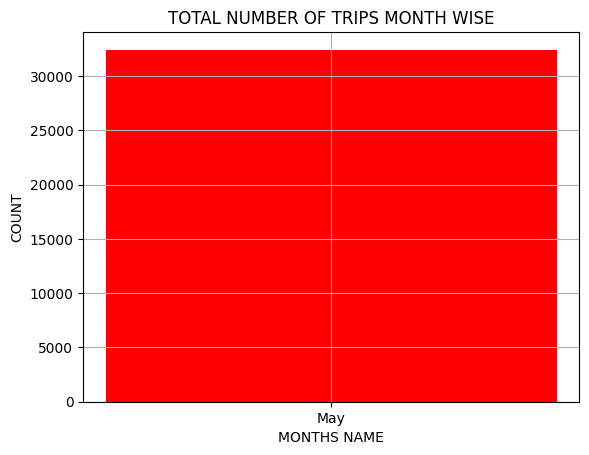

In [429]:
total_by_month=DATA1['month_name'].value_counts()
plt.bar(total_by_month.index,total_by_month.values,color=['r','m'])
plt.xlabel("MONTHS NAME")
plt.ylabel("COUNT")
plt.title("TOTAL NUMBER OF TRIPS MONTH WISE")
plt.grid(True)
plt.show()

#the data only has may month

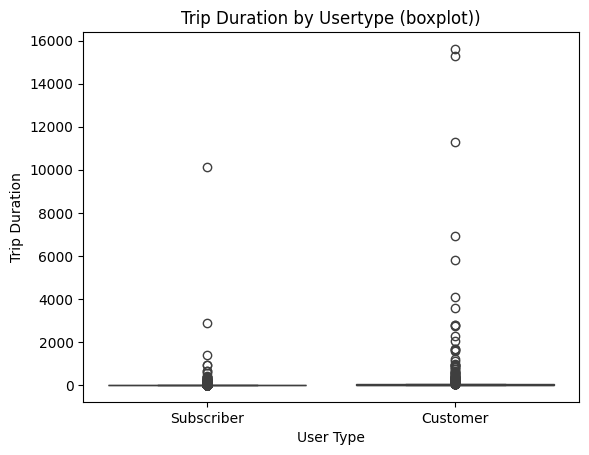

In [430]:
# SNS BOXPLOT

sns.boxplot(x='usertype', y='tripduration', data=DATA1)
plt.title("Trip Duration by Usertype (boxplot))")
plt.xlabel("User Type")
plt.ylabel("Trip Duration")
plt.show()


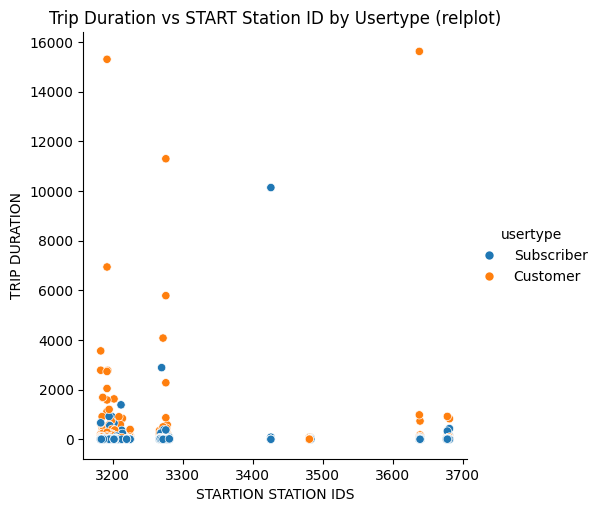

In [431]:
# SNS RELPLOT

sns.relplot(x='start station id', y='tripduration', hue='usertype', data=DATA1)
plt.xlabel("STARTION STATION IDS")
plt.ylabel("TRIP DURATION")
plt.title("Trip Duration vs START Station ID by Usertype (relplot)")
plt.show()

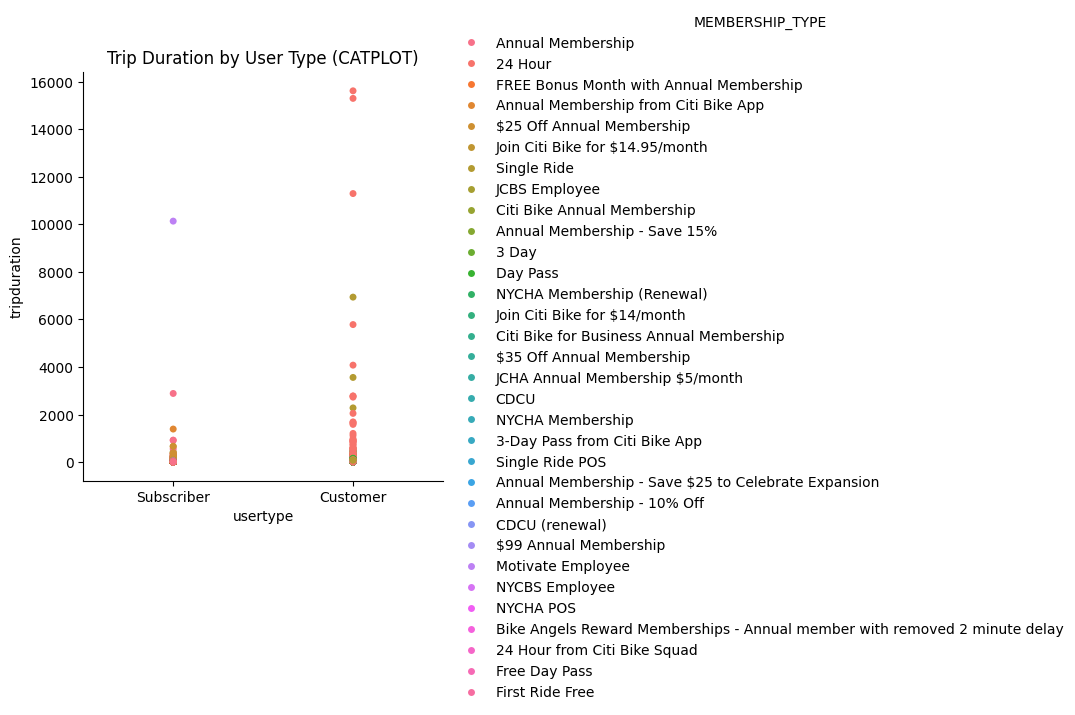

In [432]:
# CATPLOT
sns.catplot(x='usertype', y='tripduration', jitter=False, data=DATA1,
            hue='MEMBERSHIP_TYPE',height=6)
plt.title("Trip Duration by User Type (CATPLOT)")
plt.show()

Text(0.5, 1.0, 'TRIP DURATION BY USER TYPE WITH HUE DAY NAME \n TOP 10 DURATION ONLY \n (CATPLOT WITH KIND BAR)')

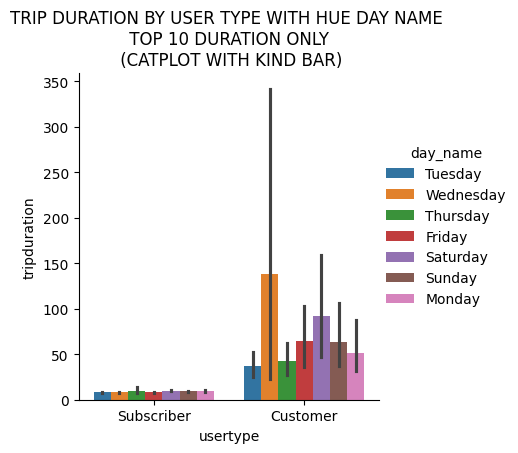

In [433]:
sns.catplot(x='usertype',y="tripduration",
            kind='bar',
            hue='day_name',
            data=DATA1,height=4)
plt.title("TRIP DURATION BY USER TYPE WITH HUE DAY NAME \n TOP 10 DURATION ONLY \n (CATPLOT WITH KIND BAR)")

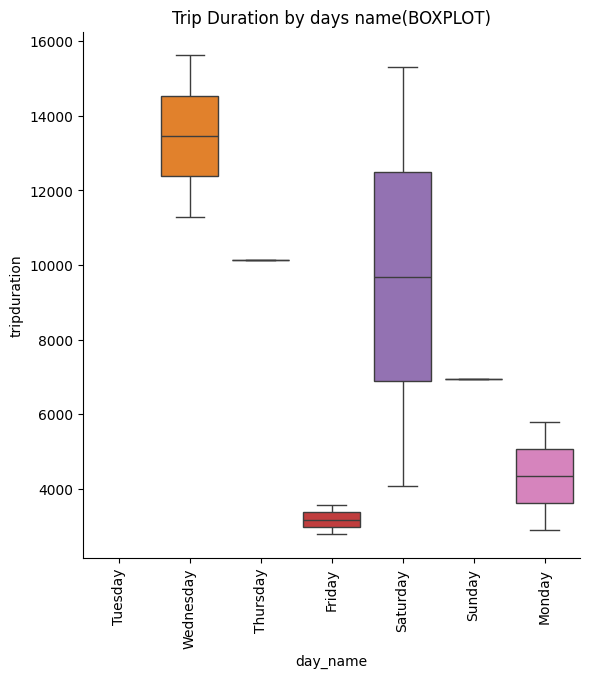

In [434]:
sns.catplot(x='day_name', y=DATA1['tripduration'].sort_values(ascending=False).head(10),
            kind='box',
            data=DATA1,
            hue='day_name',height=6)
plt.xticks(rotation=90)
plt.title("Trip Duration by days name(BOXPLOT)")
plt.show()


Text(0.5, 1.0, 'Trip Duration by weekday vs weekend (VIOLIN)')

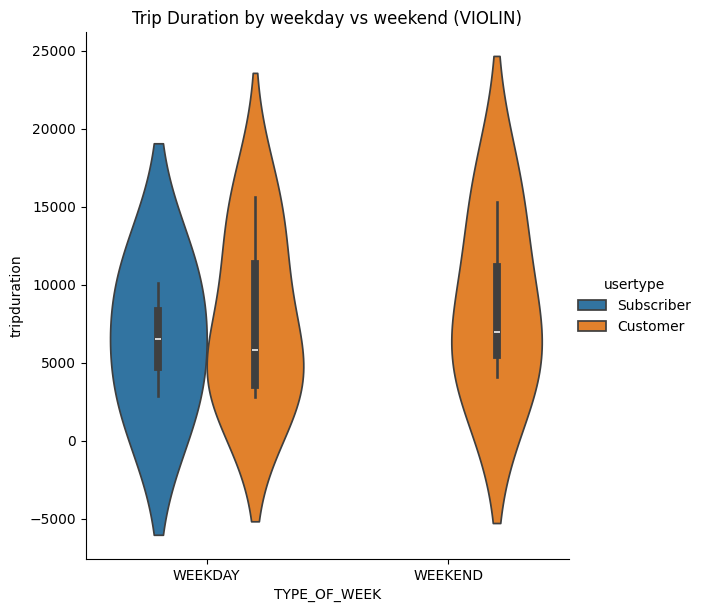

In [435]:
sns.catplot(x='TYPE_OF_WEEK',y=DATA1['tripduration'].sort_values(ascending=False).head(10),
            kind='violin',
            hue='usertype',data=DATA1,height=6)
plt.title("Trip Duration by weekday vs weekend (VIOLIN)")

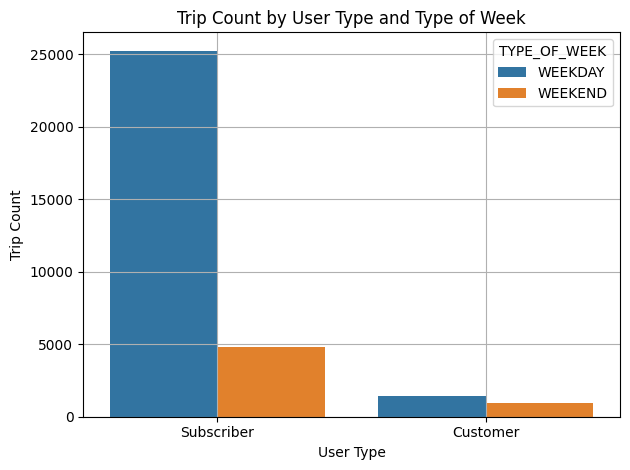

In [436]:
sns.countplot(x='usertype', hue='TYPE_OF_WEEK',data=DATA1, )
plt.xlabel('User Type')
plt.ylabel('Trip Count')
plt.title('Trip Count by User Type and Type of Week')
plt.grid(True)
plt.tight_layout()
plt.show()

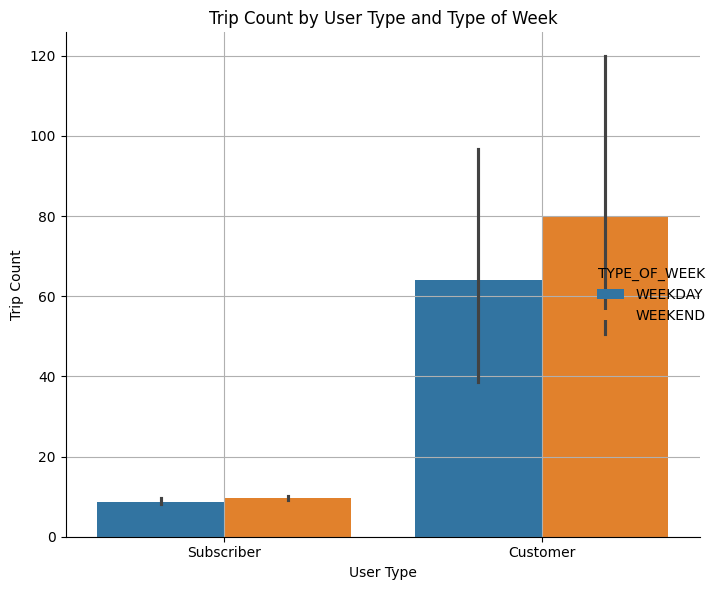

In [437]:
sns.catplot(x='usertype',y='tripduration',kind='bar',hue='TYPE_OF_WEEK',data=DATA1,height=6 )
plt.xlabel('User Type')
plt.ylabel('Trip Count')
plt.title('Trip Count by User Type and Type of Week')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

sns.pairplot(DATA1, height=2.5, aspect=1.2)
plt.title("PAIRPLOT")

# **✅ Final Conclusion –**

**Trip Patterns by User Type**

*   Customers, take more trips than Subscriber
*   Customers prefer riding on weekends, probably for leisure or travel.

*** Duration of Trips***
*   On weekdays, the average trip duration is short, likely for office or college travel.
*   On weekends, trips are longer, indicating relaxation or   
sightseeing rides

**Time of Day**

*   Most trips happen in the morning and evening, showing work or school timings.
*   Very few trips occur during night hours.
*   usage count in morning is high
*  Average Duaration in evening is high

*** What Visualizations Did We Use?***

*    Bar Charts
*    Box Plots
*    Pie Charts
*    Scatter Plot
*    Scatter Plots
*    Violin Plots

All made using Matplotlib and Seaborn
Data Cleaning Done
Removed extra or empty columns
Converted tripduration from seconds to minutes (2 decimal places)
Added weekday/weekend, hour, and day name columns

 **What the Data Tells Us** *italicized text*


*   Trips are short for most users, but a few very long trips exist
*   Weekdays have more trips but of shorter duration

*   Weekends have fewer trips, but trips are longer



**Overall Summary**


*  User behavior changes with the day of the week
*   Subscribers are regular riders; they travel fast and frequently
*   Customers use bikes for fun or exploring, mostly on weekends

**IMPROVEMENT**
1.  This info can help improve:
2.  Bike placement
3.   Route planning
4.  Marketing strategies for different user types










